#### Build env for pytorch (Linux)

Step:
> Gpu driver -> Anaconda -> CUDA 11.4 -> CUDNN 8.2.4 -> pytorch (CUDA 11.3)

#### COCO label format


One image may has several different labels for several bboxs.

X_center, Y_center, width, height are all normalized.

> [ class, x_center, Y_center, width, height ]

#### Some functions of yolov5

Use eval() trans str to class variable or get its values

In [5]:
# yolo.py
import torch

Conv = torch.nn.Conv2d
m = 'Conv'

nc = 80

out = eval(m)
ncout = eval('nc')

print(out)
print(ncout)
#get model type
print(str(out)[8:-2].replace('__main__.', ''))


<class 'torch.nn.modules.conv.Conv2d'>
80
torch.nn.modules.conv.Conv2d


Use function glob.glob() match all the files (jpg) in this path 

In [ ]:
# datasets.py
import glob

f = [] # image file
p = '../datasets/coco128/images/train2017'
f += glob.glob(str(p / '**' / '*.*'), recursive=True)

#### Pytorch Parallel load

[blog here](https://www.cnblogs.com/rossiXYZ/p/15496268.html)

#### Out images what means

[【YOLOV5-5.x 源码解读】plots.py](https://blog.csdn.net/qq_38253797/article/details/119324328#t16)

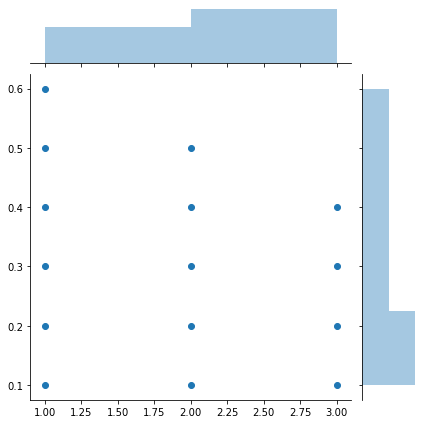

In [1]:
import pandas as pd 
import seaborn

z = []
x = [1,1,1,1,1,1,2,2,2,2,2,3,3,3,3]
y = [0.1,0.2,0.3,0.4,0.5,0.6,0.1,0.2,0.3,0.4,0.5,0.1,0.2,0.3,0.4]
for i in range(len(x)):
    z.append([x[i],y[i]])
d = pd.DataFrame(data=z,columns=["x","y"])
seaborn.jointplot(x, y, data=d)


#### Anchor check and kmeans

- [ ] aotoanchor.py

In [13]:
import torch
x = torch.rand(9,3)
y = x > (1 / 4.0)
z = y.float()
aat = (x > 1 / 4.0).float().sum(1).mean()
x,y,z,aat

(tensor([[0.9987, 0.4606, 0.2662],
         [0.0640, 0.8735, 0.8845],
         [0.4710, 0.2992, 0.1994],
         [0.9702, 0.5670, 0.9559],
         [0.4971, 0.6929, 0.3856],
         [0.0347, 0.5235, 0.6991],
         [0.8520, 0.0066, 0.8028],
         [0.6735, 0.3914, 0.2730],
         [0.1168, 0.8100, 0.4208]]),
 tensor([[ True,  True,  True],
         [False,  True,  True],
         [ True,  True, False],
         [ True,  True,  True],
         [ True,  True,  True],
         [False,  True,  True],
         [ True, False,  True],
         [ True,  True,  True],
         [False,  True,  True]]),
 tensor([[1., 1., 1.],
         [0., 1., 1.],
         [1., 1., 0.],
         [1., 1., 1.],
         [1., 1., 1.],
         [0., 1., 1.],
         [1., 0., 1.],
         [1., 1., 1.],
         [0., 1., 1.]]),
 tensor(2.4444))

In [5]:
import numpy as np
from scipy.cluster.vq import kmeans
wh = np.random.rand(30,2)
k, dist = kmeans(wh , 9, iter=30)
k,dist

(array([[0.86136651, 0.01883577],
        [0.89528275, 0.35641624],
        [0.03661116, 0.19573723],
        [0.5099941 , 0.18243157],
        [0.27532591, 0.52233336],
        [0.82716384, 0.66406463],
        [0.89979829, 0.90387673],
        [0.55372053, 0.65660052],
        [0.0931474 , 0.7874335 ]]),
 0.08533956926786078)

In [25]:
import numpy as np
npr = np.random
sh = k.shape
v = np.ones(sh)
v,(v == 1).all()
rash = npr.random(sh)
rash,(rash < 0.9)
ranp = (rash < 0.9) * npr.random()
ranp
ran0 = npr.randn(*sh)
ran0,ran0.mean(),ran0.var()#正态分布
ran1 = ranp*ran0
ran2 = ran1*0.1+1#均值为1
ran2.mean(),ran2.var()
ran2.clip(0.3,3.0)#最小值0.3，最大值3.0


array([[1.03350099, 0.96731592],
       [1.00295711, 1.04702634],
       [1.04110075, 1.00480547],
       [1.00730593, 0.99970796],
       [0.98628401, 0.9779736 ],
       [1.00207599, 1.01298974],
       [1.00974475, 1.00545968],
       [1.01267274, 1.02589173],
       [1.00247916, 1.00752988]])

In [12]:
import torch
x = torch.randn(3)
j = [False,True,False]
y = x[j]#filter取出true的元素
x,j,y

(tensor([ 0.6869, -1.0011, -1.2449]), [False, True, False], tensor([-1.0011]))

In [27]:
import torch
x = torch.randn(3,2,2)
j = torch.tensor([False,True])
j = torch.stack((j,j,j))
y = x[j]#filter取出true的元素
x,j,y

(tensor([[[-1.0907,  0.4897],
          [-1.7261, -1.2323]],
 
         [[ 1.3804,  0.2697],
          [-0.8053,  0.0666]],
 
         [[-0.5010, -0.1266],
          [-0.2418,  0.4528]]]),
 tensor([[False,  True],
         [False,  True],
         [False,  True]]),
 tensor([[-1.7261, -1.2323],
         [-0.8053,  0.0666],
         [-0.2418,  0.4528]]))

In [5]:
import torch
ps=torch.tensor([  [-1.7500,  0.0835],
                            [-1.1768, -1.3984],
                            [-0.8174, -0.4229],
                            [-1.2812, -2.1250],
                            [-1.6895, -0.1453],
                            [-1.4268, -1.1973]],dtype=torch.float16)
t = torch.full_like(ps, 0.0)
t

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float16)

In [20]:
import torch
x = torch.tensor([1,2,3,4])
# y = x[:, None]
x[1:2]

tensor([2])

In [19]:
import torch
conf_thres = 0.1
x = torch.rand(3,8)
i = (x[:, 5:] > conf_thres).nonzero(as_tuple=False).T
x,i

(tensor([[0.4985, 0.4533, 0.3320, 0.2781, 0.9147, 0.4574, 0.0976, 0.7233],
         [0.6826, 0.3700, 0.5449, 0.8972, 0.2434, 0.4928, 0.3886, 0.4931],
         [0.3669, 0.6466, 0.1916, 0.7146, 0.0051, 0.6431, 0.5016, 0.1057]]),
 tensor([[0, 0, 1, 1, 1, 2, 2, 2],
         [0, 2, 0, 1, 2, 0, 1, 2]]))

In [43]:
import torch
import numpy as np
torch.manual_seed(0)
x = torch.randint(0,6,size = (5,2))
y = torch.rand(1,5).T
matches = torch.cat((x, y), 1).numpy()
matches = matches[matches[:, 2].argsort()[::-1]]
z = np.unique(matches[:, 1], return_index=True)
matches1 = matches[z[1]]
matches2 = matches1[np.unique(matches1[:, 0], return_index=True)[1]]
x,y,matches,matches1,z,matches2

(tensor([[2, 3],
         [5, 0],
         [1, 3],
         [1, 1],
         [1, 3]]),
 tensor([[0.3489],
         [0.4017],
         [0.0223],
         [0.1689],
         [0.2939]]),
 array([[5.        , 0.        , 0.4017173 ],
        [2.        , 3.        , 0.34889346],
        [1.        , 3.        , 0.29388845],
        [1.        , 1.        , 0.16885895],
        [1.        , 3.        , 0.02232575]], dtype=float32),
 array([[5.        , 0.        , 0.4017173 ],
        [1.        , 1.        , 0.16885895],
        [2.        , 3.        , 0.34889346]], dtype=float32),
 (array([0., 1., 3.], dtype=float32), array([0, 3, 1])),
 array([[1.        , 1.        , 0.16885895],
        [2.        , 3.        , 0.34889346],
        [5.        , 0.        , 0.4017173 ]], dtype=float32))

In [48]:
import numpy as np
import torch
torch.manual_seed(0)
s = torch.randint(0,16,size = (10,))
nt = np.bincount(s, minlength=16)
s,nt

(tensor([12, 15,  5,  0,  3, 11,  3,  7,  9,  3]),
 array([1, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]))